## Time Series Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from prepare import prepare_power_data, prepare_store_data

import warnings
warnings.filterwarnings('ignore')

In [2]:
# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

## Germany Power Generation

Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

In [3]:
power = prepare_power_data()

In [4]:
power

,consumption,wind,solar,wind+solar,month,year,wind_and_solar
date,,,,,,,
2006-01-01,1069.18400,0.000,0.000,0.000,1,2006,0.000
2006-01-02,1380.52100,0.000,0.000,0.000,1,2006,0.000
2006-01-03,1442.53300,0.000,0.000,0.000,1,2006,0.000
2006-01-04,1457.21700,0.000,0.000,0.000,1,2006,0.000
2006-01-05,1477.13100,0.000,0.000,0.000,1,2006,0.000
...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,12,2017,411.037
2017-12-28,1299.86398,506.424,14.162,520.586,12,2017,520.586
2017-12-29,1295.08753,584.277,29.854,614.131,12,2017,614.131


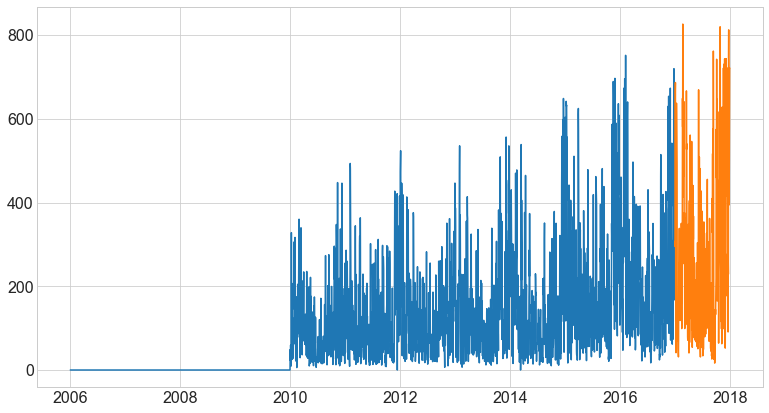

In [5]:
train = power[:'2016'] # includes 2016
test = power['2017']

plt.plot(train.index, train.wind)
plt.plot(test.index, test.wind)

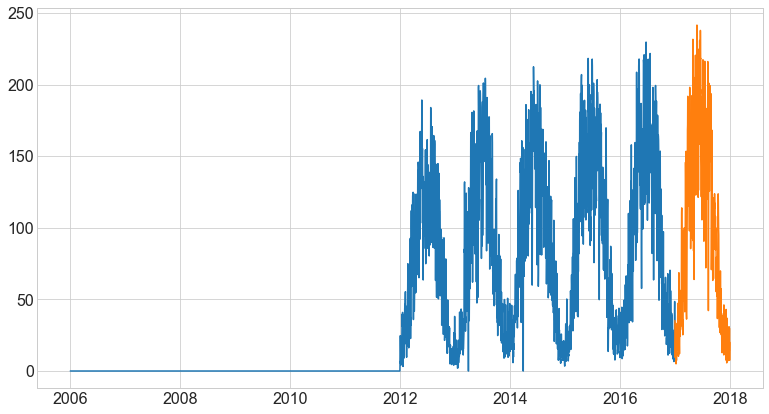

In [6]:
train = power[:'2016'] # includes 2016
test = power['2017']

plt.plot(train.index, train.solar)
plt.plot(test.index, test.solar)

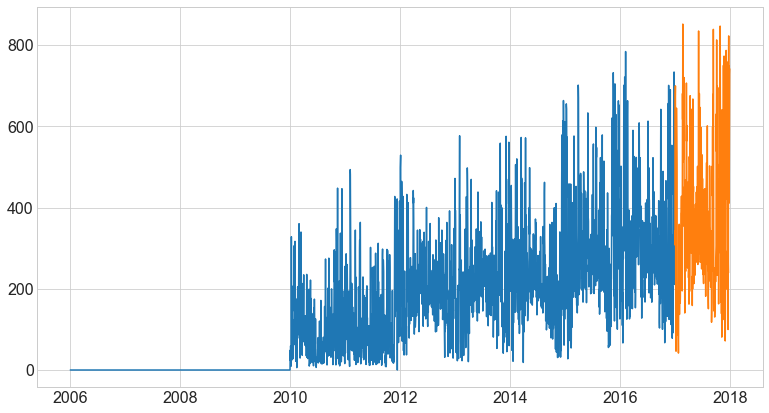

In [7]:
train = power[:'2016'] # includes 2016
test = power['2017']

plt.plot(train.index, train.wind_and_solar)
plt.plot(test.index, test.wind_and_solar)

### Don't consider the time series

In [8]:
y1 = train.wind
y2 = train.solar
y3 = train.wind_and_solar

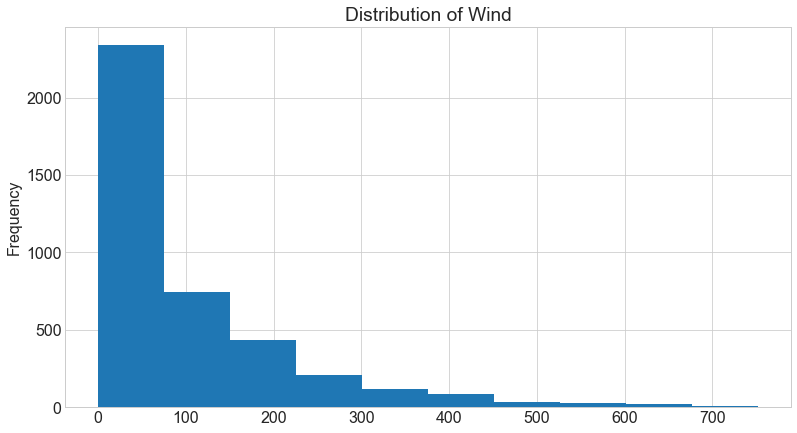

In [9]:
y1.plot.hist()
plt.title('Distribution of Wind')
plt.show()

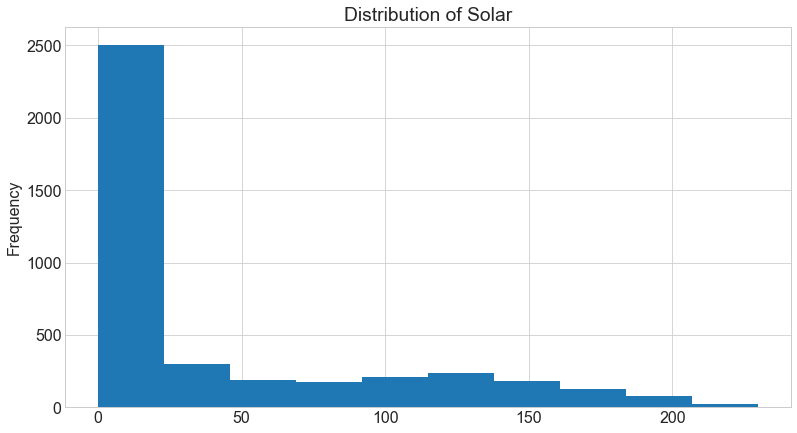

In [10]:
y2.plot.hist()
plt.title('Distribution of Solar')
plt.show()

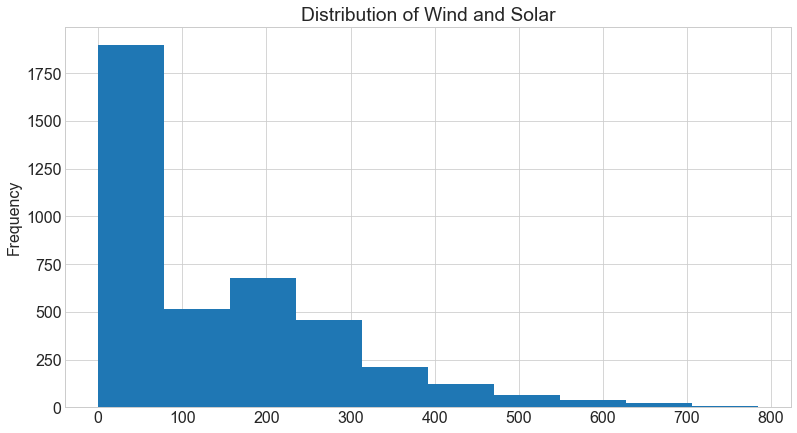

In [11]:
y3.plot.hist() 
plt.title('Distribution of Wind and Solar')
plt.show()

In [12]:
train['weekday'] = train.index.day_name()

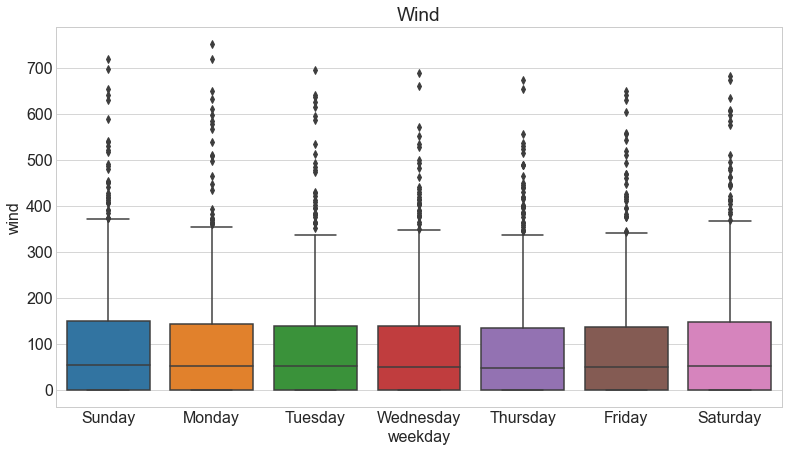

In [34]:
sns.boxplot(data = train, y = 'wind', x = 'weekday')
plt.title('Wind')
plt.show()

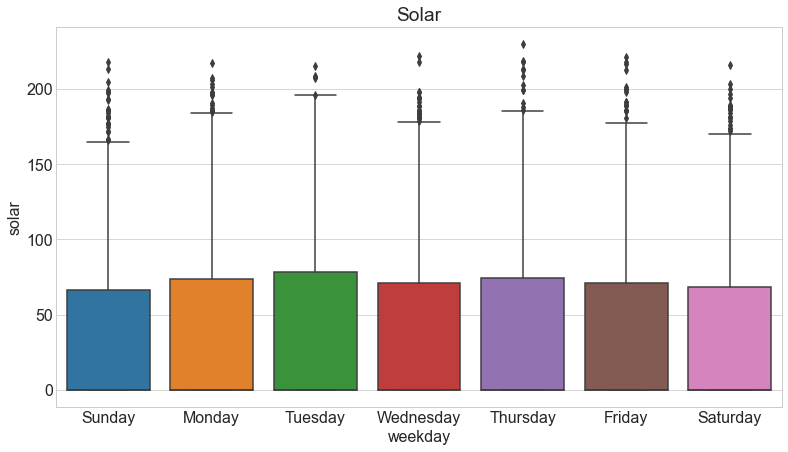

In [35]:
sns.boxplot(data = train, y = 'solar', x = 'weekday')
plt.title('Solar')
plt.show()

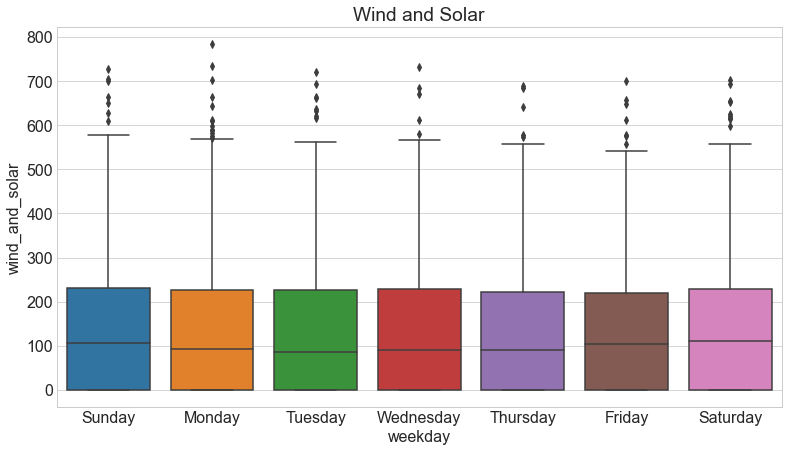

In [36]:
sns.boxplot(data = train, y = 'wind_and_solar', x = 'weekday')
plt.title('Wind and Solar')
plt.show()

### Visualize the target over time

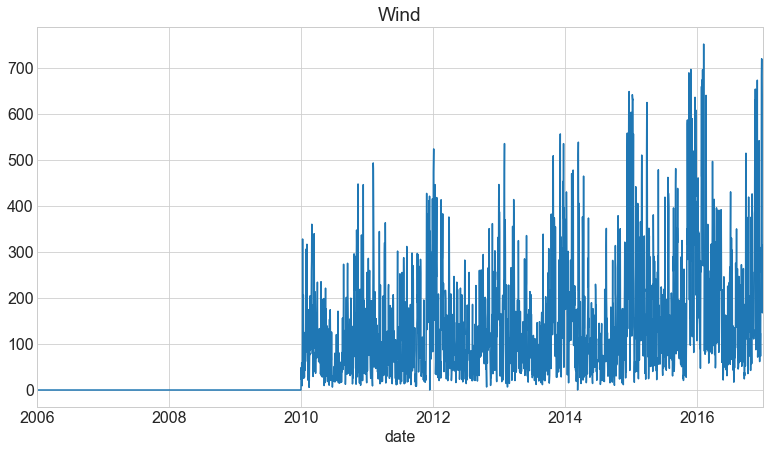

In [22]:
y1.plot()
plt.title('Wind')
plt.show()

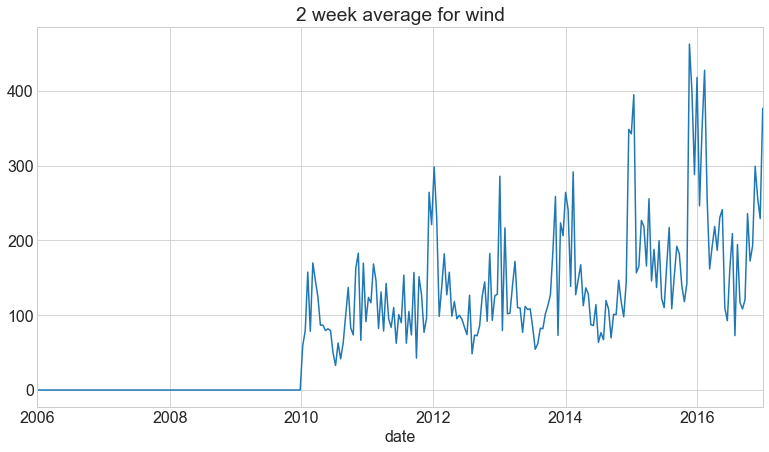

In [18]:
y1.resample('2W').mean().plot(title='2 week average for wind')
plt.show()

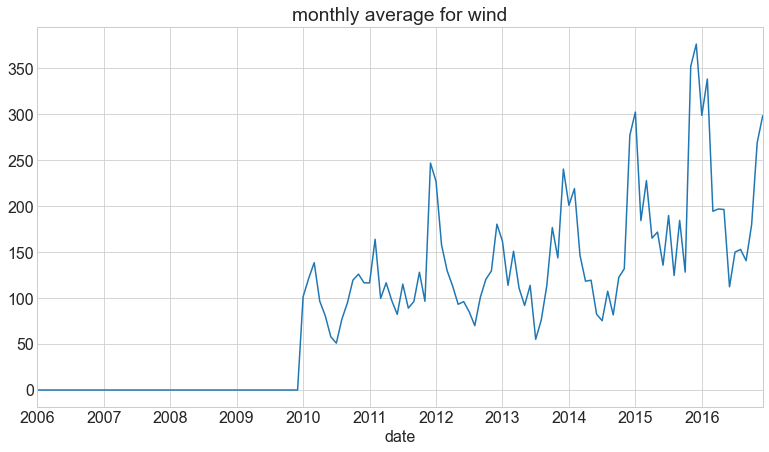

In [19]:
y1.resample('M').mean().plot(title='monthly average for wind')
plt.show()

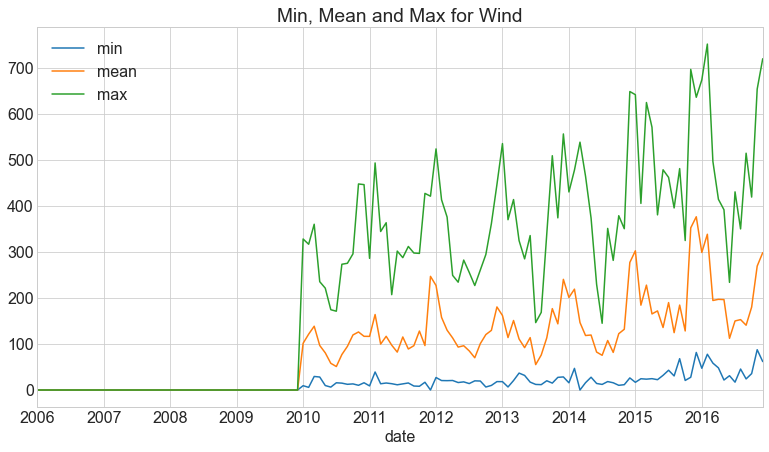

In [23]:
y1.resample('M').agg(['min', 'mean', 'max']).plot()
plt.title('Min, Mean and Max for Wind')
plt.show()

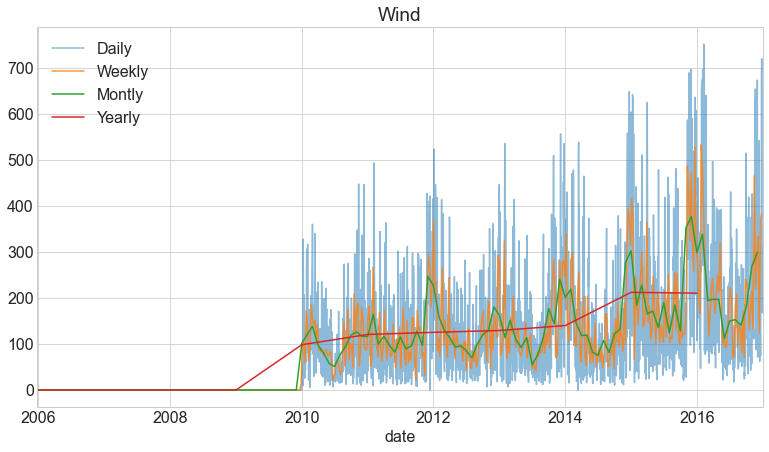

In [26]:
y1.resample('D').mean().plot(alpha=.5, label='Daily')
y1.resample('W').mean().plot(alpha=.8, label='Weekly')
y1.resample('M').mean().plot(label='Montly')
y1.resample('Y').mean().plot(label='Yearly')
plt.legend()
plt.title('Wind')
plt.show()

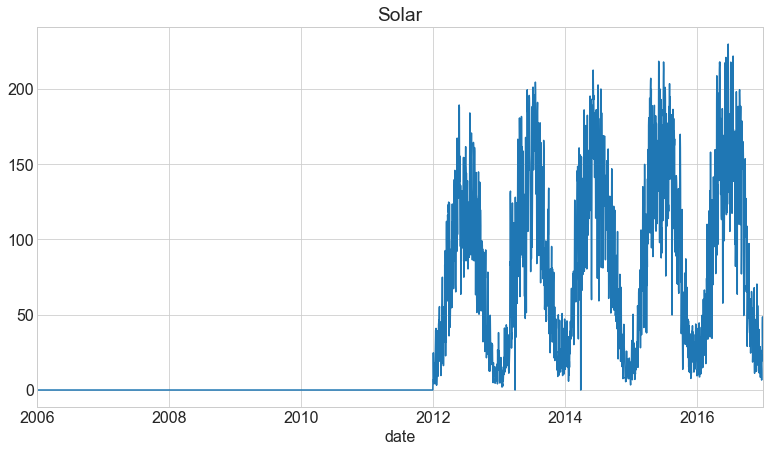

In [28]:
y2.plot()
plt.title('Solar')
plt.show()

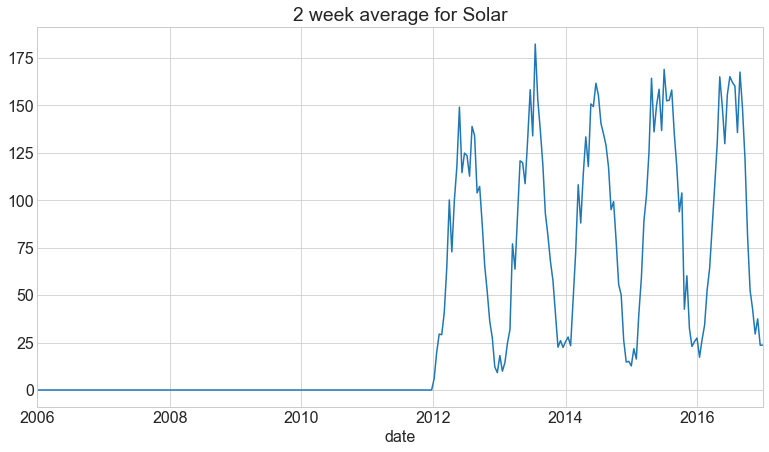

In [30]:
y2.resample('2W').mean().plot(title='2 week average for Solar')
plt.show()

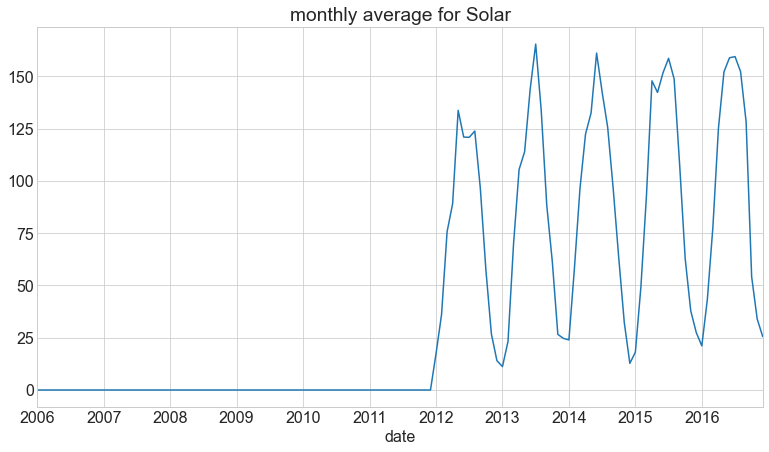

In [31]:
y2.resample('M').mean().plot(title='monthly average for Solar')
plt.show()

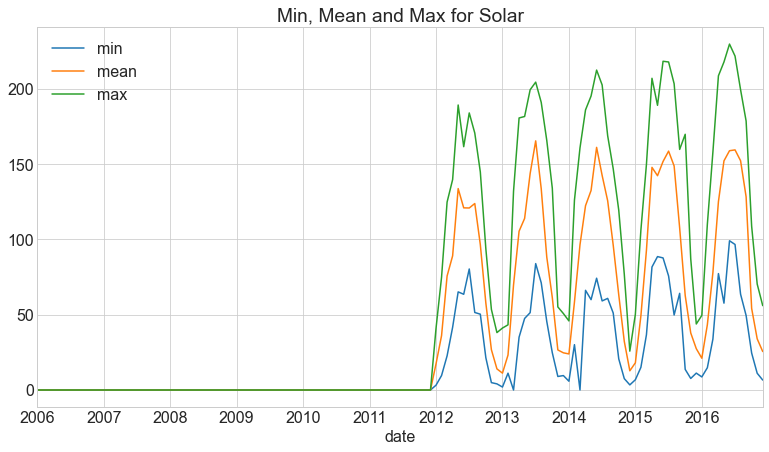

In [32]:
y2.resample('M').agg(['min', 'mean', 'max']).plot()
plt.title('Min, Mean and Max for Solar')
plt.show()

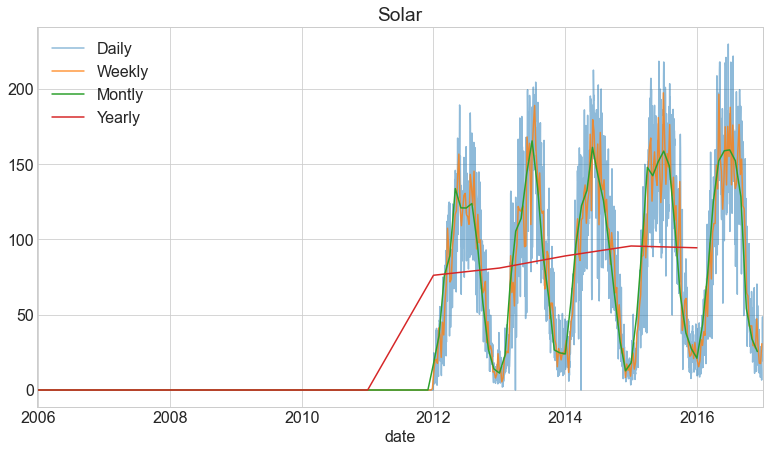

In [40]:
y2.resample('D').mean().plot(alpha=.5, label='Daily')
y2.resample('W').mean().plot(alpha=.8, label='Weekly')
y2.resample('M').mean().plot(label='Montly')
y2.resample('Y').mean().plot(label='Yearly')
plt.legend()
plt.title('Solar')
plt.show()

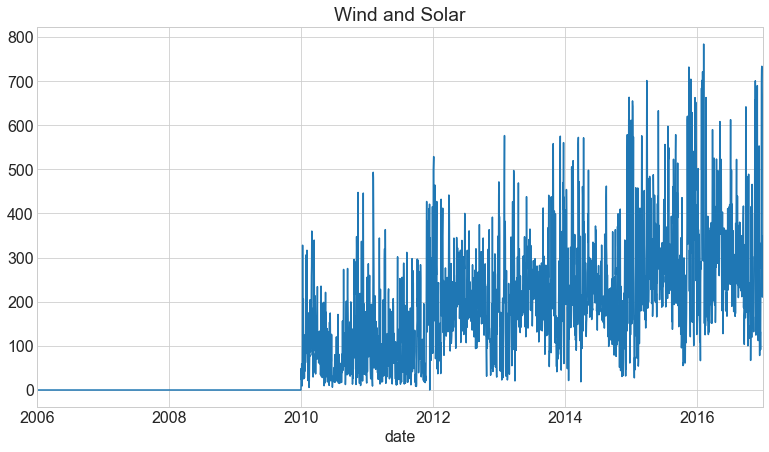

In [33]:
y3.plot()
plt.title('Wind and Solar')
plt.show()

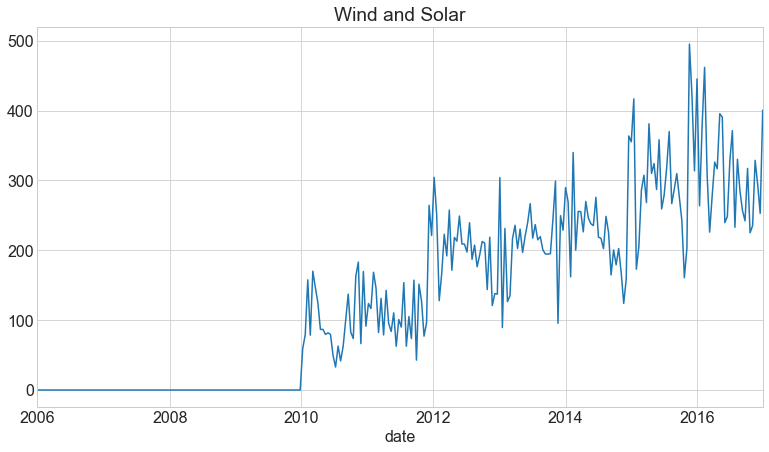

In [37]:
y3.resample('2W').mean().plot(title='2 week average')
plt.title('Wind and Solar')
plt.show()

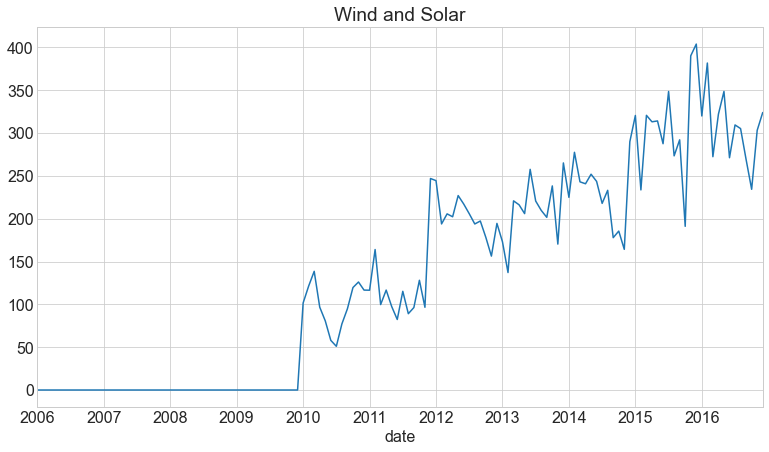

In [38]:
y3.resample('M').mean().plot(title='monthly average')
plt.title('Wind and Solar')
plt.show()

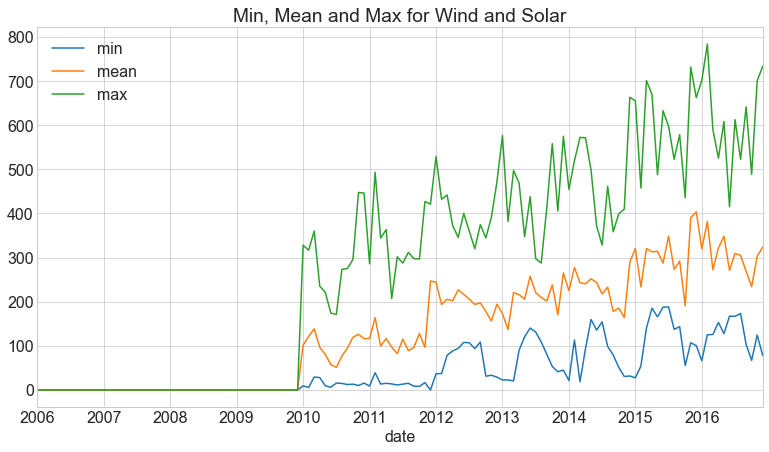

In [39]:
y3.resample('M').agg(['min', 'mean', 'max']).plot()
plt.title('Min, Mean and Max for Wind and Solar')
plt.show()

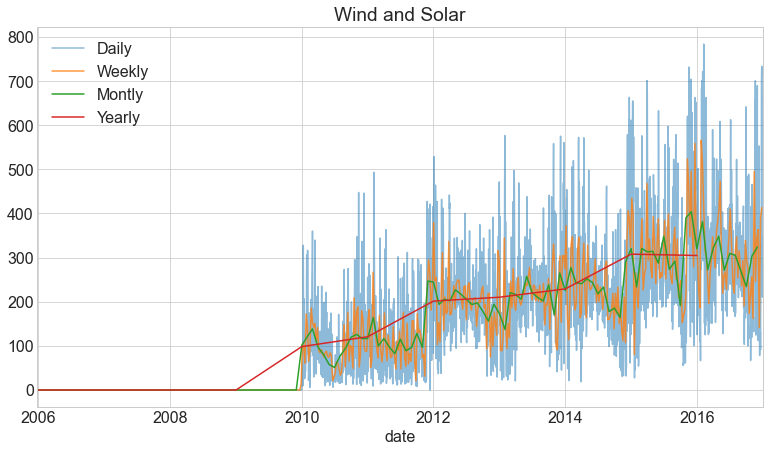

In [41]:
y3.resample('D').mean().plot(alpha=.5, label='Daily')
y3.resample('W').mean().plot(alpha=.8, label='Weekly')
y3.resample('M').mean().plot(label='Montly')
y3.resample('Y').mean().plot(label='Yearly')
plt.legend()
plt.title('Wind and Solar')
plt.show()

### Visualize change over time

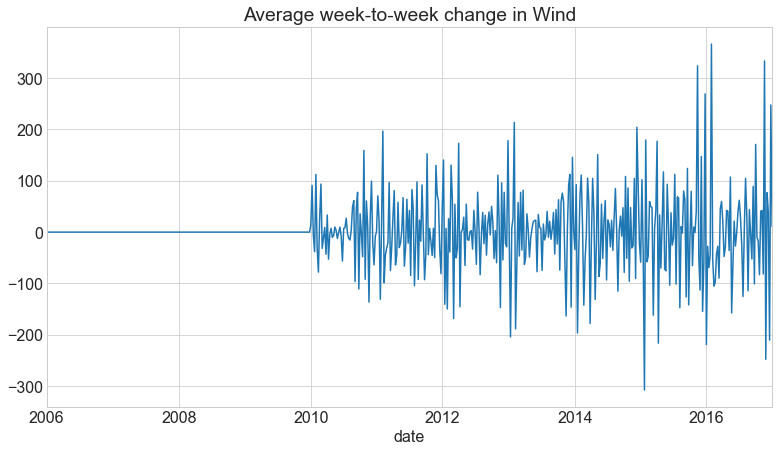

In [44]:
y1.resample('W').mean().diff().plot(title='Average week-to-week change in Wind')
plt.show()

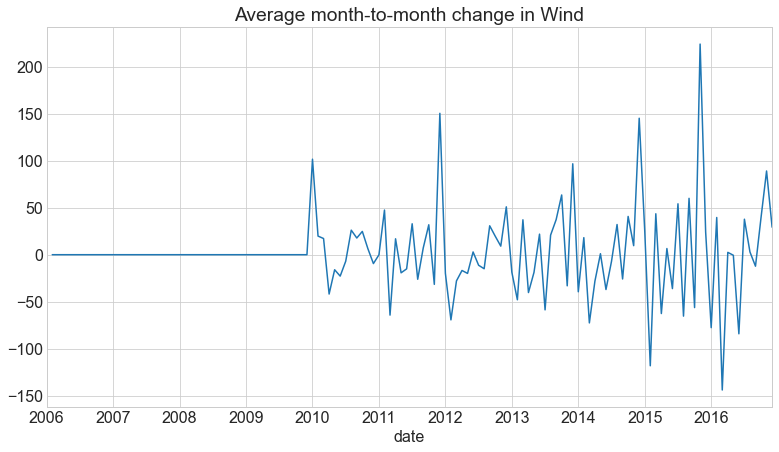

In [49]:
y1.resample('M').mean().diff().plot(title='Average month-to-month change in Wind')
plt.show()

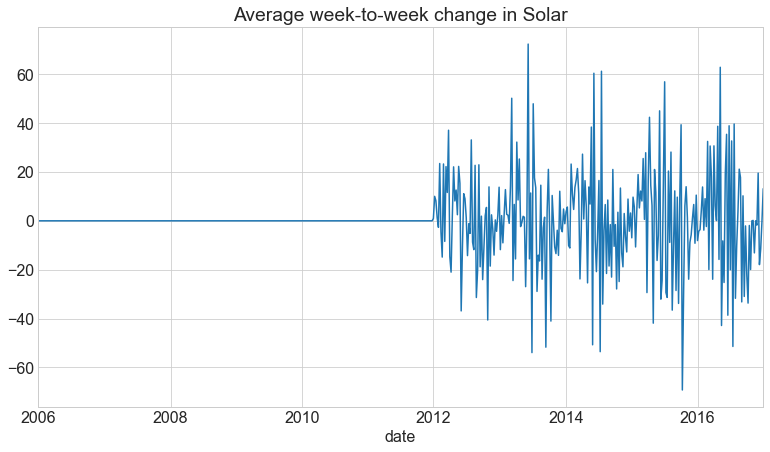

In [46]:
y2.resample('W').mean().diff().plot(title='Average week-to-week change in Solar')
plt.show()

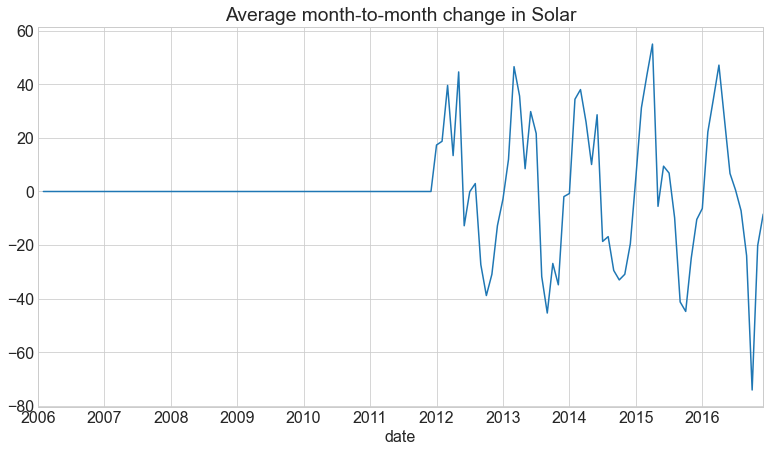

In [50]:
y2.resample('M').mean().diff().plot(title='Average month-to-month change in Solar')
plt.show()

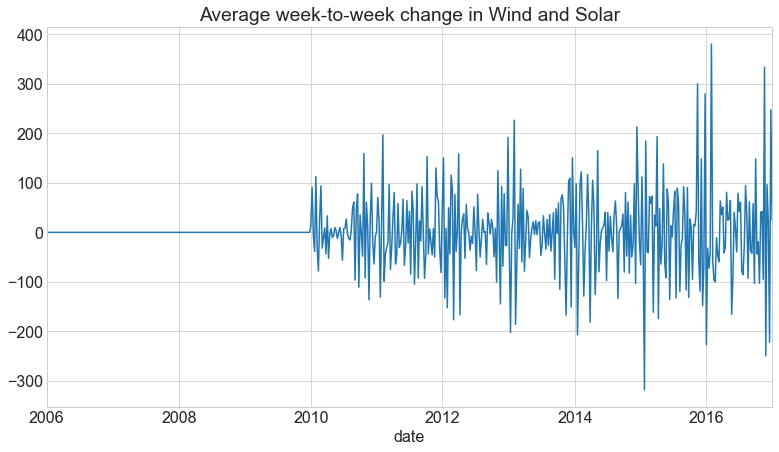

In [51]:
y3.resample('W').mean().diff().plot(title='Average week-to-week change in Wind and Solar')
plt.show()

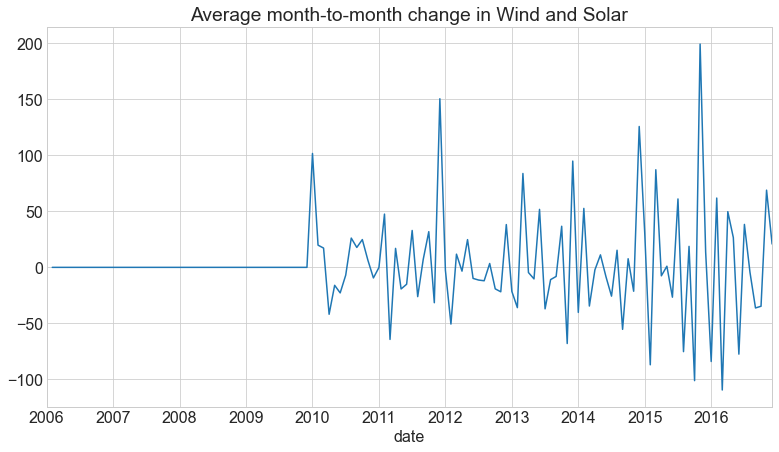

In [52]:
y3.resample('M').mean().diff().plot(title='Average month-to-month change in Wind and Solar')
plt.show()

### Seasonal Plot

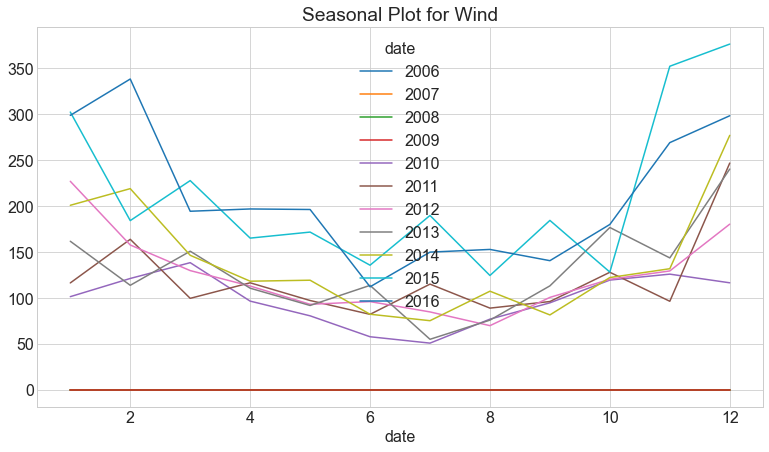

In [55]:
# .unstack turns an index level into columns, year into columns
y1.groupby([y1.index.year, y1.index.month]).mean().unstack(0).plot(title='Seasonal Plot for Wind')
plt.show()

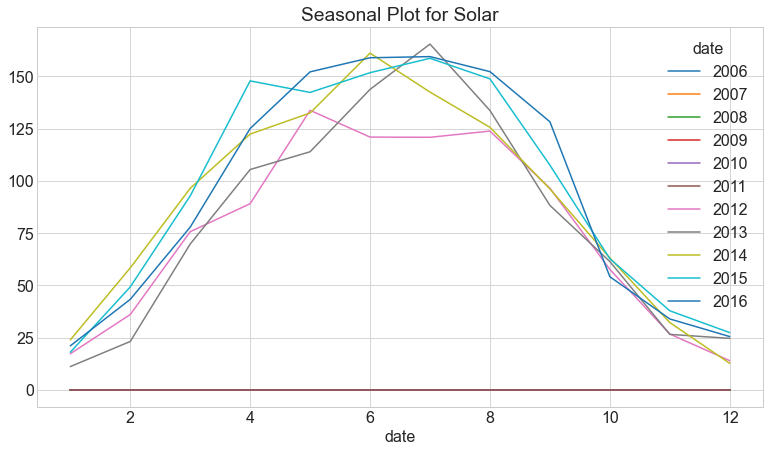

In [56]:
# .unstack turns an index level into columns, year into columns
y2.groupby([y2.index.year, y2.index.month]).mean().unstack(0).plot(title='Seasonal Plot for Solar')
plt.show()

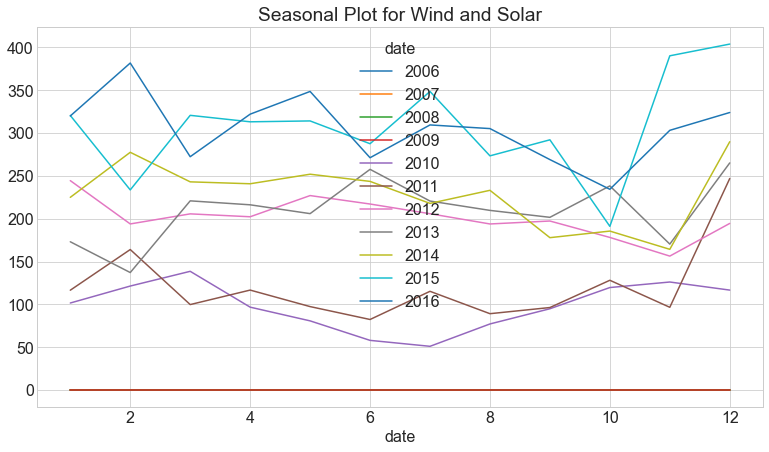

In [57]:
# .unstack turns an index level into columns, year into columns
y3.groupby([y3.index.year, y3.index.month]).mean().unstack(0).plot(title='Seasonal Plot for Wind and Solar')
plt.show()

### Seasonal Subseries Plot

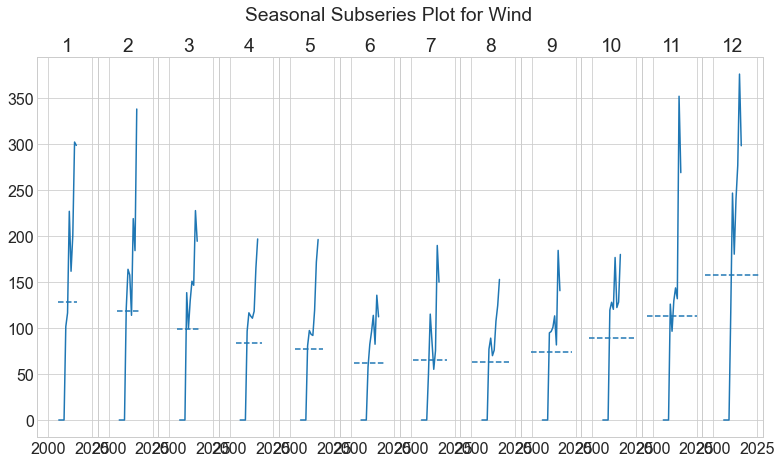

In [59]:
#with this unstack, the months become columns
table = y1.groupby([y1.index.year, y1.index.month]).mean().unstack()

#puts together the 12(monthly) subplots together
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    #creates the average line(dashed)
    ax.hlines(subset.mean(), *ax.get_xlim(), ls='--')
    ax.set(xlabel='')


fig.suptitle('Seasonal Subseries Plot for Wind') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

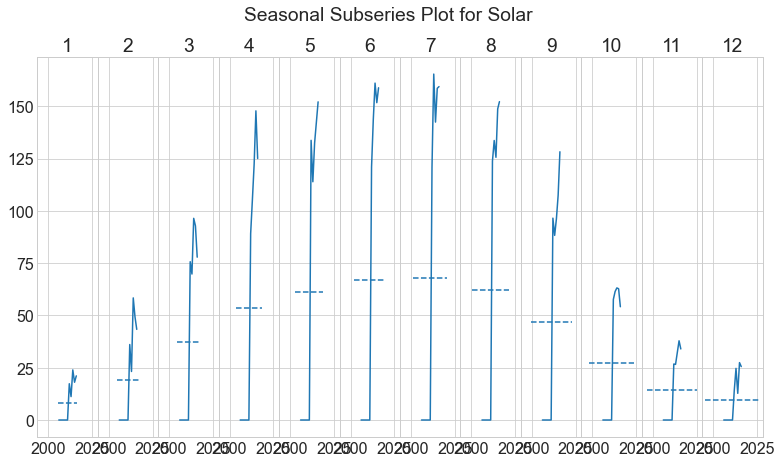

In [60]:
#with this unstack, the months become columns
table = y2.groupby([y2.index.year, y2.index.month]).mean().unstack()

#puts together the 12(monthly) subplots together
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    #creates the average line(dashed)
    ax.hlines(subset.mean(), *ax.get_xlim(), ls='--')
    ax.set(xlabel='')


fig.suptitle('Seasonal Subseries Plot for Solar') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

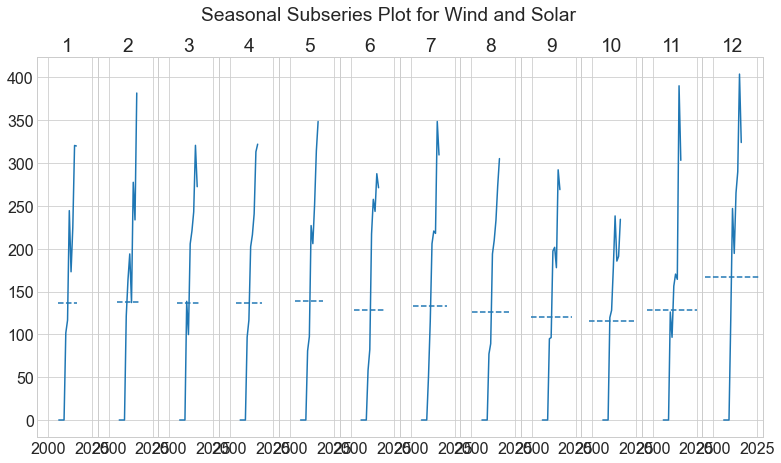

In [61]:
#with this unstack, the months become columns
table = y3.groupby([y3.index.year, y3.index.month]).mean().unstack()

#puts together the 12(monthly) subplots together
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    #creates the average line(dashed)
    ax.hlines(subset.mean(), *ax.get_xlim(), ls='--')
    ax.set(xlabel='')


fig.suptitle('Seasonal Subseries Plot for Wind and Solar') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

### Lag Plot

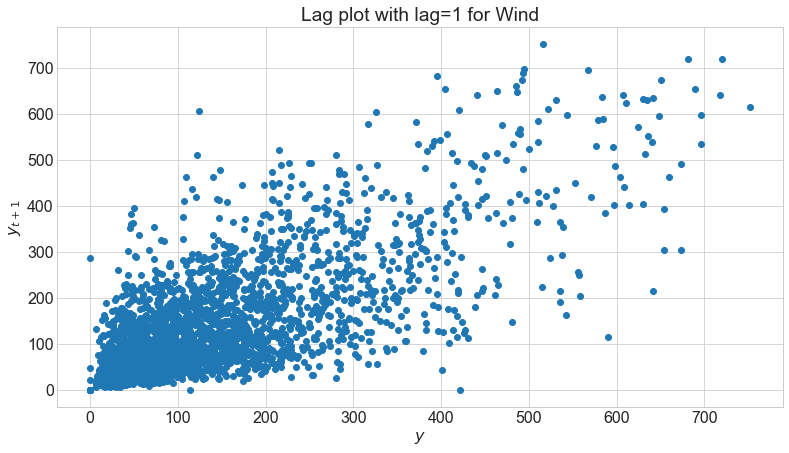

In [63]:
plt.scatter(y1, y1.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1 for Wind')
plt.show()

,consumption,this_week,solar,wind+solar,month,year,wind_and_solar,the_next_week
date,,,,,,,,
2006-01-01,1069.184000,0.000000,0.000000,0.000000,1.000000,2006.0,0.000000,0.000000
2006-01-08,1381.300143,0.000000,0.000000,0.000000,1.000000,2006.0,0.000000,0.000000
2006-01-15,1486.730286,0.000000,0.000000,0.000000,1.000000,2006.0,0.000000,0.000000
2006-01-22,1490.031143,0.000000,0.000000,0.000000,1.000000,2006.0,0.000000,0.000000
2006-01-29,1514.176857,0.000000,0.000000,0.000000,1.000000,2006.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2016-12-04,1532.636714,295.015429,47.255000,342.270429,11.571429,2016.0,342.270429,334.445429
2016-12-11,1538.948143,334.445429,29.317000,363.762429,12.000000,2016.0,363.762429,124.087286
2016-12-18,1509.774000,124.087286,17.804000,141.891286,12.000000,2016.0,141.891286,371.722000


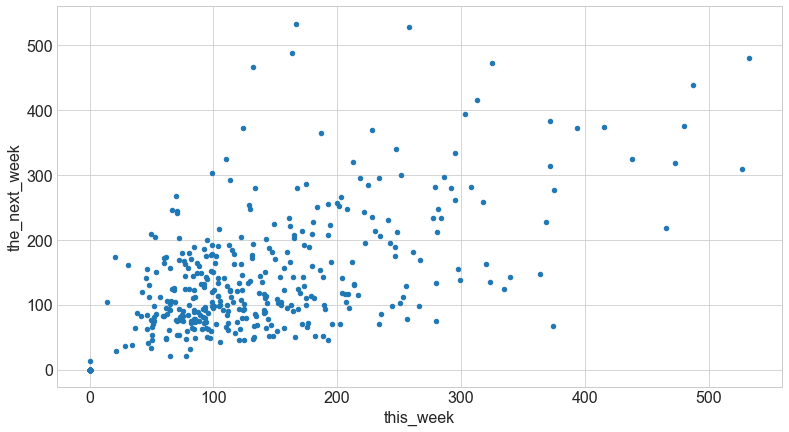

In [70]:
weekly = train.resample('W').mean()
weekly['the_next_week'] = weekly.wind.shift(-1)
weekly = weekly.rename(columns={'wind': 'this_week'})
weekly.plot.scatter(x='this_week', y='the_next_week')
weekly

,consumption,this_week,solar,wind+solar,month,year,wind_and_solar,12_weeks_out
date,,,,,,,,
2006-01-01,1069.184000,0.000000,0.000000,0.000000,1.000000,2006.0,0.000000,0.0
2006-01-08,1381.300143,0.000000,0.000000,0.000000,1.000000,2006.0,0.000000,0.0
2006-01-15,1486.730286,0.000000,0.000000,0.000000,1.000000,2006.0,0.000000,0.0
2006-01-22,1490.031143,0.000000,0.000000,0.000000,1.000000,2006.0,0.000000,0.0
2006-01-29,1514.176857,0.000000,0.000000,0.000000,1.000000,2006.0,0.000000,0.0
...,...,...,...,...,...,...,...,...
2016-12-04,1532.636714,295.015429,47.255000,342.270429,11.571429,2016.0,342.270429,NaN
2016-12-11,1538.948143,334.445429,29.317000,363.762429,12.000000,2016.0,363.762429,NaN
2016-12-18,1509.774000,124.087286,17.804000,141.891286,12.000000,2016.0,141.891286,NaN


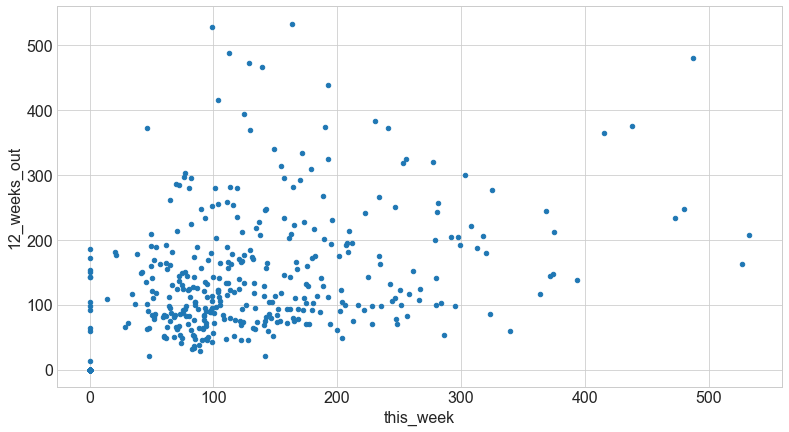

In [73]:
weekly = train.resample('W').mean()
weekly['12_weeks_out'] = weekly.wind.shift(-12)
weekly = weekly.rename(columns={'wind': 'this_week'})
weekly.plot.scatter(x='this_week', y='12_weeks_out')
weekly

,consumption,this_week,solar,wind+solar,month,year,wind_and_solar,half_a_year_later
date,,,,,,,,
2006-01-01,1069.184000,0.000000,0.000000,0.000000,1.000000,2006.0,0.000000,0.0
2006-01-08,1381.300143,0.000000,0.000000,0.000000,1.000000,2006.0,0.000000,0.0
2006-01-15,1486.730286,0.000000,0.000000,0.000000,1.000000,2006.0,0.000000,0.0
2006-01-22,1490.031143,0.000000,0.000000,0.000000,1.000000,2006.0,0.000000,0.0
2006-01-29,1514.176857,0.000000,0.000000,0.000000,1.000000,2006.0,0.000000,0.0
...,...,...,...,...,...,...,...,...
2016-12-04,1532.636714,295.015429,47.255000,342.270429,11.571429,2016.0,342.270429,NaN
2016-12-11,1538.948143,334.445429,29.317000,363.762429,12.000000,2016.0,363.762429,NaN
2016-12-18,1509.774000,124.087286,17.804000,141.891286,12.000000,2016.0,141.891286,NaN


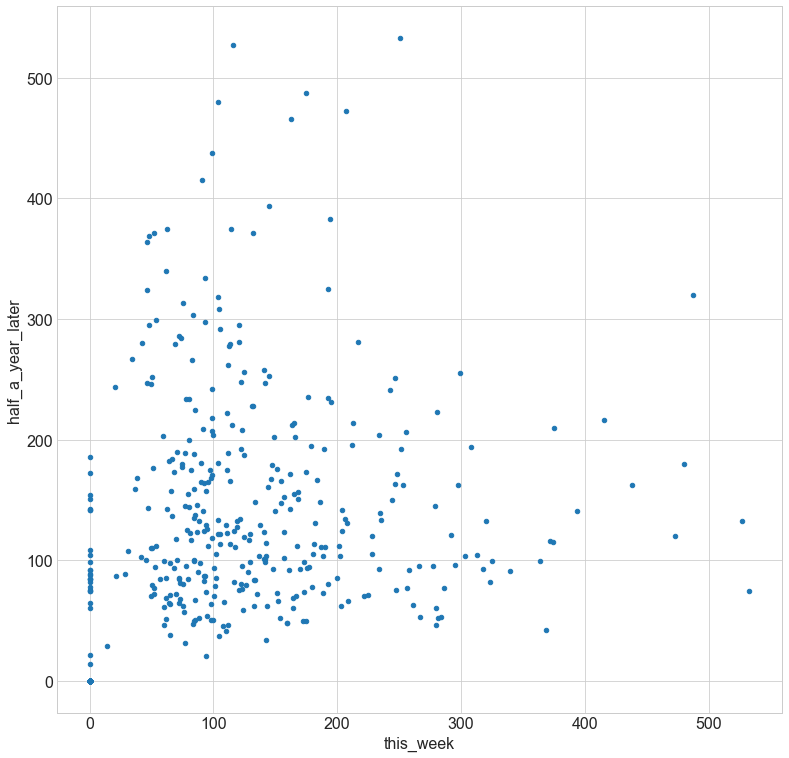

In [76]:
weekly = train.resample('W').mean()
weekly['half_a_year_later'] = weekly.wind.shift(-26)
weekly = weekly.rename(columns={'wind': 'this_week'})
weekly.plot.scatter(x='this_week', y='half_a_year_later', figsize=(13, 13))
weekly

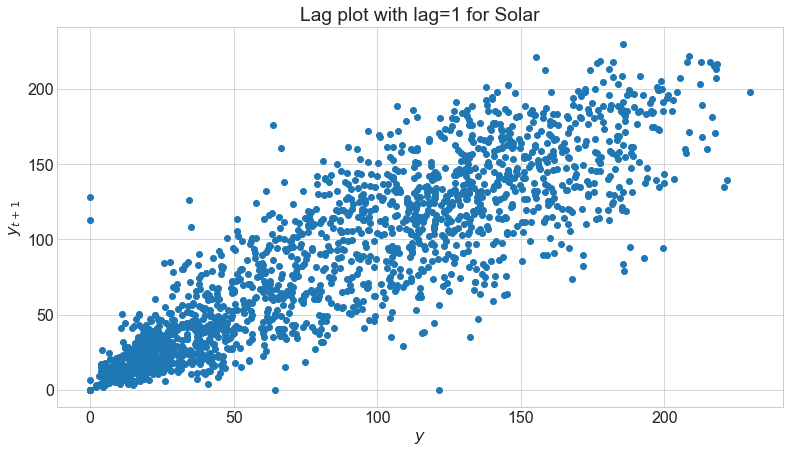

In [64]:
plt.scatter(y2, y2.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1 for Solar')
plt.show()

,consumption,wind,this_week,wind+solar,month,year,wind_and_solar,the_next_week
date,,,,,,,,
2006-01-01,1069.184000,0.000000,0.000000,0.000000,1.000000,2006.0,0.000000,0.000000
2006-01-08,1381.300143,0.000000,0.000000,0.000000,1.000000,2006.0,0.000000,0.000000
2006-01-15,1486.730286,0.000000,0.000000,0.000000,1.000000,2006.0,0.000000,0.000000
2006-01-22,1490.031143,0.000000,0.000000,0.000000,1.000000,2006.0,0.000000,0.000000
2006-01-29,1514.176857,0.000000,0.000000,0.000000,1.000000,2006.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2016-12-04,1532.636714,295.015429,47.255000,342.270429,11.571429,2016.0,342.270429,29.317000
2016-12-11,1538.948143,334.445429,29.317000,363.762429,12.000000,2016.0,363.762429,17.804000
2016-12-18,1509.774000,124.087286,17.804000,141.891286,12.000000,2016.0,141.891286,17.585857


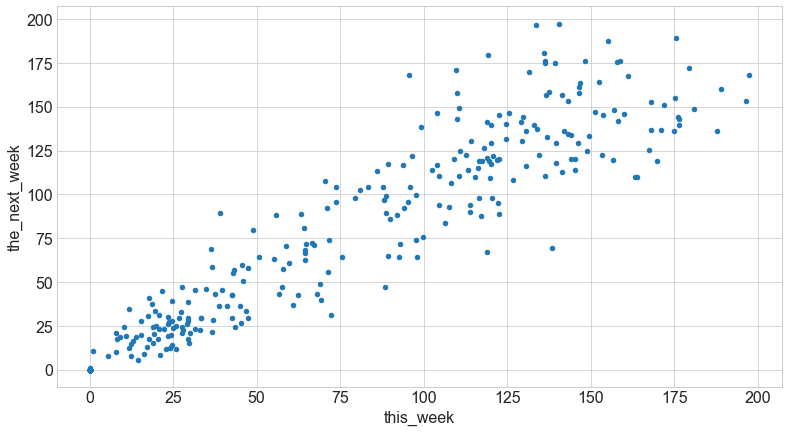

In [71]:
weekly = train.resample('W').mean()
weekly['the_next_week'] = weekly.solar.shift(-1)
weekly = weekly.rename(columns={'solar': 'this_week'})
weekly.plot.scatter(x='this_week', y='the_next_week')
weekly

,consumption,wind,this_week,wind+solar,month,year,wind_and_solar,12_weeks_out
date,,,,,,,,
2006-01-01,1069.184000,0.000000,0.000000,0.000000,1.000000,2006.0,0.000000,0.0
2006-01-08,1381.300143,0.000000,0.000000,0.000000,1.000000,2006.0,0.000000,0.0
2006-01-15,1486.730286,0.000000,0.000000,0.000000,1.000000,2006.0,0.000000,0.0
2006-01-22,1490.031143,0.000000,0.000000,0.000000,1.000000,2006.0,0.000000,0.0
2006-01-29,1514.176857,0.000000,0.000000,0.000000,1.000000,2006.0,0.000000,0.0
...,...,...,...,...,...,...,...,...
2016-12-04,1532.636714,295.015429,47.255000,342.270429,11.571429,2016.0,342.270429,NaN
2016-12-11,1538.948143,334.445429,29.317000,363.762429,12.000000,2016.0,363.762429,NaN
2016-12-18,1509.774000,124.087286,17.804000,141.891286,12.000000,2016.0,141.891286,NaN


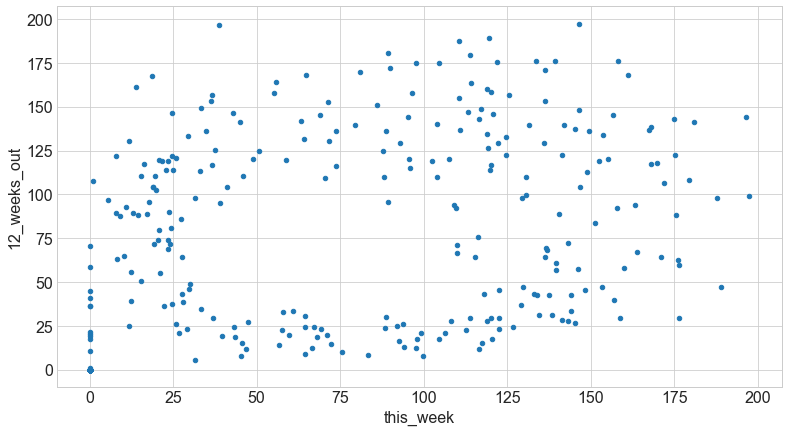

In [74]:
weekly = train.resample('W').mean()
weekly['12_weeks_out'] = weekly.solar.shift(-12)
weekly = weekly.rename(columns={'solar': 'this_week'})
weekly.plot.scatter(x='this_week', y='12_weeks_out')
weekly

,consumption,wind,this_week,wind+solar,month,year,wind_and_solar,half_a_year_later
date,,,,,,,,
2006-01-01,1069.184000,0.000000,0.000000,0.000000,1.000000,2006.0,0.000000,0.0
2006-01-08,1381.300143,0.000000,0.000000,0.000000,1.000000,2006.0,0.000000,0.0
2006-01-15,1486.730286,0.000000,0.000000,0.000000,1.000000,2006.0,0.000000,0.0
2006-01-22,1490.031143,0.000000,0.000000,0.000000,1.000000,2006.0,0.000000,0.0
2006-01-29,1514.176857,0.000000,0.000000,0.000000,1.000000,2006.0,0.000000,0.0
...,...,...,...,...,...,...,...,...
2016-12-04,1532.636714,295.015429,47.255000,342.270429,11.571429,2016.0,342.270429,NaN
2016-12-11,1538.948143,334.445429,29.317000,363.762429,12.000000,2016.0,363.762429,NaN
2016-12-18,1509.774000,124.087286,17.804000,141.891286,12.000000,2016.0,141.891286,NaN


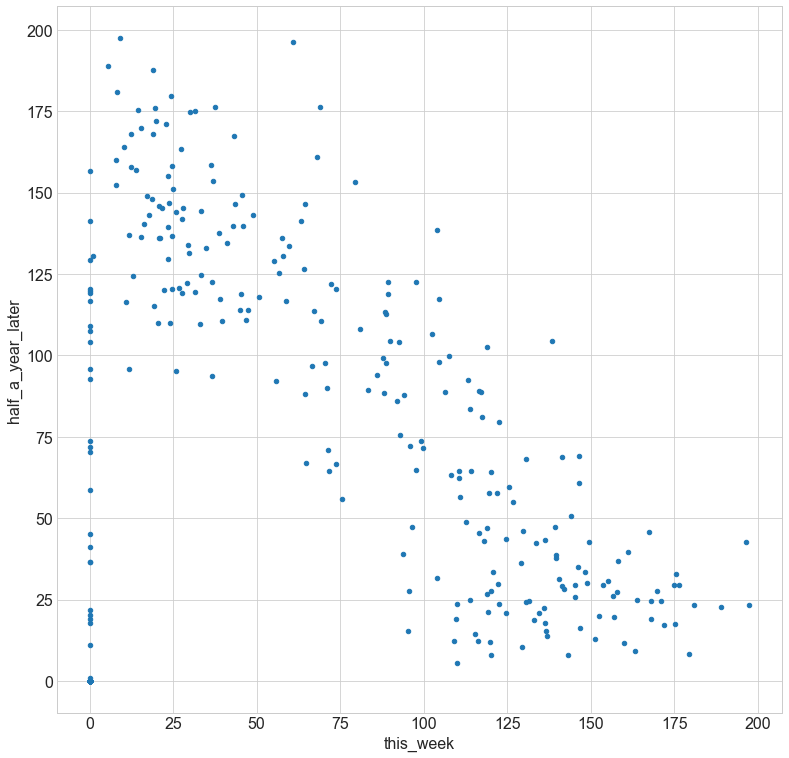

In [77]:
weekly = train.resample('W').mean()
weekly['half_a_year_later'] = weekly.solar.shift(-26)
weekly = weekly.rename(columns={'solar': 'this_week'})
weekly.plot.scatter(x='this_week', y='half_a_year_later', figsize=(13, 13))
weekly

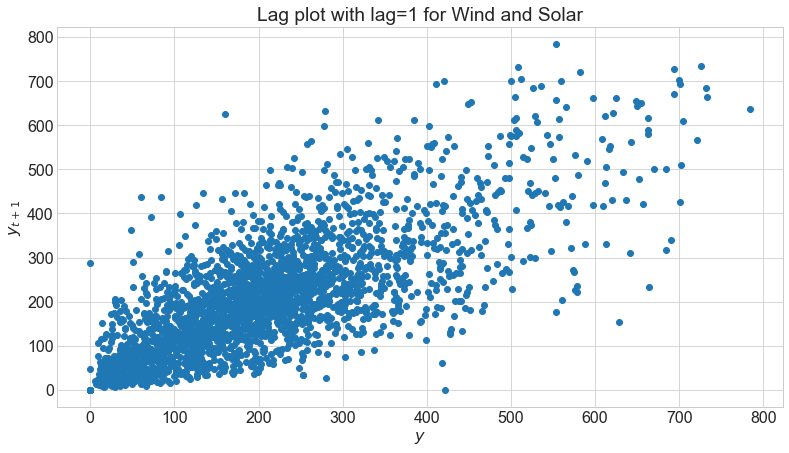

In [65]:
plt.scatter(y3, y3.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1 for Wind and Solar')
plt.show()

,consumption,wind,solar,wind+solar,month,year,this_week,the_next_week
date,,,,,,,,
2006-01-01,1069.184000,0.000000,0.000000,0.000000,1.000000,2006.0,0.000000,0.000000
2006-01-08,1381.300143,0.000000,0.000000,0.000000,1.000000,2006.0,0.000000,0.000000
2006-01-15,1486.730286,0.000000,0.000000,0.000000,1.000000,2006.0,0.000000,0.000000
2006-01-22,1490.031143,0.000000,0.000000,0.000000,1.000000,2006.0,0.000000,0.000000
2006-01-29,1514.176857,0.000000,0.000000,0.000000,1.000000,2006.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2016-12-04,1532.636714,295.015429,47.255000,342.270429,11.571429,2016.0,342.270429,363.762429
2016-12-11,1538.948143,334.445429,29.317000,363.762429,12.000000,2016.0,363.762429,141.891286
2016-12-18,1509.774000,124.087286,17.804000,141.891286,12.000000,2016.0,141.891286,389.307857


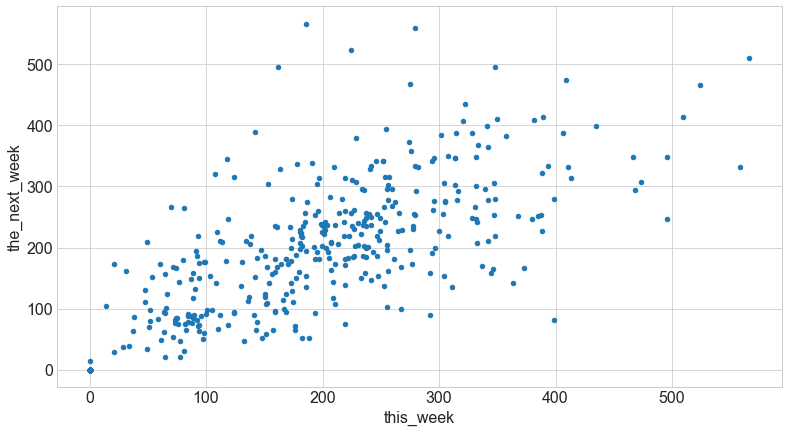

In [72]:
weekly = train.resample('W').mean()
weekly['the_next_week'] = weekly.wind_and_solar.shift(-1)
weekly = weekly.rename(columns={'wind_and_solar': 'this_week'})
weekly.plot.scatter(x='this_week', y='the_next_week')
weekly

,consumption,wind,this_week,wind+solar,month,year,wind_and_solar,12_weeks_out
date,,,,,,,,
2006-01-01,1069.184000,0.000000,0.000000,0.000000,1.000000,2006.0,0.000000,0.0
2006-01-08,1381.300143,0.000000,0.000000,0.000000,1.000000,2006.0,0.000000,0.0
2006-01-15,1486.730286,0.000000,0.000000,0.000000,1.000000,2006.0,0.000000,0.0
2006-01-22,1490.031143,0.000000,0.000000,0.000000,1.000000,2006.0,0.000000,0.0
2006-01-29,1514.176857,0.000000,0.000000,0.000000,1.000000,2006.0,0.000000,0.0
...,...,...,...,...,...,...,...,...
2016-12-04,1532.636714,295.015429,47.255000,342.270429,11.571429,2016.0,342.270429,NaN
2016-12-11,1538.948143,334.445429,29.317000,363.762429,12.000000,2016.0,363.762429,NaN
2016-12-18,1509.774000,124.087286,17.804000,141.891286,12.000000,2016.0,141.891286,NaN


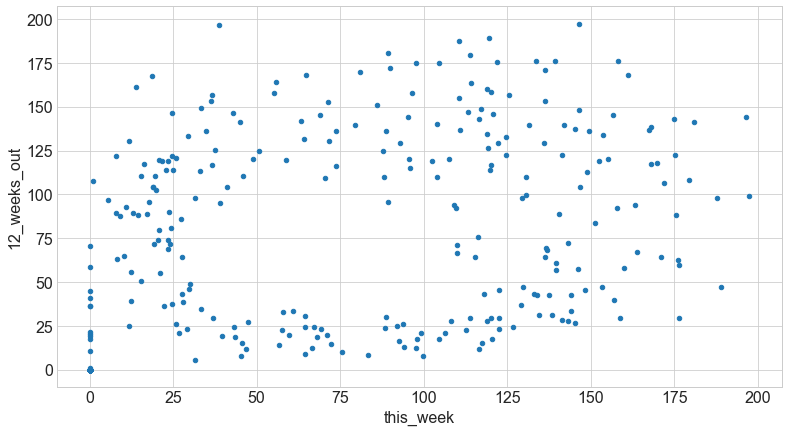

In [75]:
weekly = train.resample('W').mean()
weekly['12_weeks_out'] = weekly.solar.shift(-12)
weekly = weekly.rename(columns={'solar': 'this_week'})
weekly.plot.scatter(x='this_week', y='12_weeks_out')
weekly

,consumption,wind,solar,wind+solar,month,year,this_week,half_a_year_later
date,,,,,,,,
2006-01-01,1069.184000,0.000000,0.000000,0.000000,1.000000,2006.0,0.000000,0.0
2006-01-08,1381.300143,0.000000,0.000000,0.000000,1.000000,2006.0,0.000000,0.0
2006-01-15,1486.730286,0.000000,0.000000,0.000000,1.000000,2006.0,0.000000,0.0
2006-01-22,1490.031143,0.000000,0.000000,0.000000,1.000000,2006.0,0.000000,0.0
2006-01-29,1514.176857,0.000000,0.000000,0.000000,1.000000,2006.0,0.000000,0.0
...,...,...,...,...,...,...,...,...
2016-12-04,1532.636714,295.015429,47.255000,342.270429,11.571429,2016.0,342.270429,NaN
2016-12-11,1538.948143,334.445429,29.317000,363.762429,12.000000,2016.0,363.762429,NaN
2016-12-18,1509.774000,124.087286,17.804000,141.891286,12.000000,2016.0,141.891286,NaN


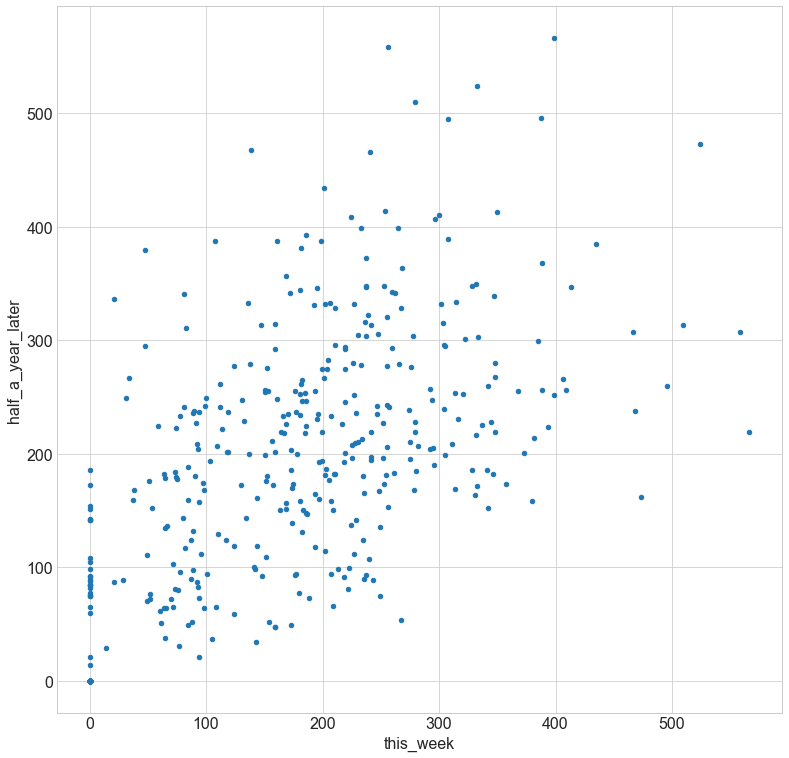

In [78]:
weekly = train.resample('W').mean()
weekly['half_a_year_later'] = weekly.wind_and_solar.shift(-26)
weekly = weekly.rename(columns={'wind_and_solar': 'this_week'})
weekly.plot.scatter(x='this_week', y='half_a_year_later', figsize=(13, 13))
weekly

### Autocorrelation Plot

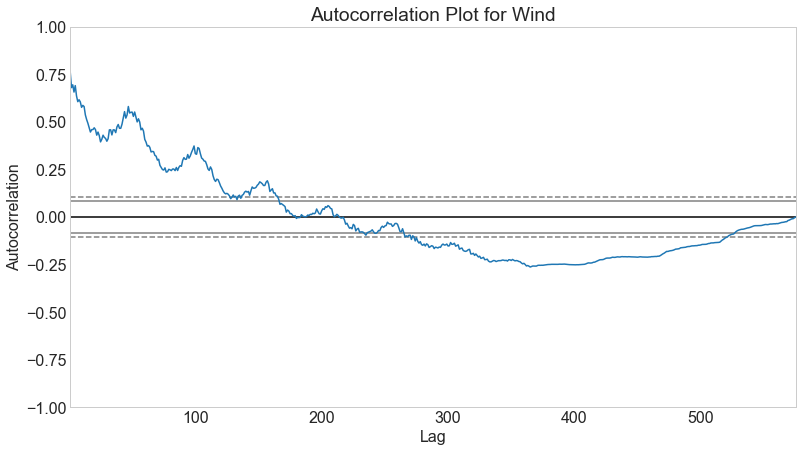

In [80]:
pd.plotting.autocorrelation_plot(train.wind.resample('W').mean())
plt.title("Autocorrelation Plot for Wind")
plt.show()

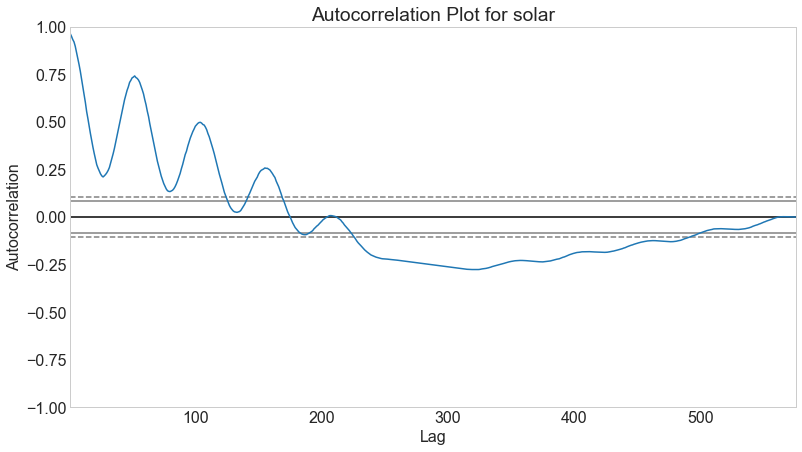

In [81]:
pd.plotting.autocorrelation_plot(train.solar.resample('W').mean())
plt.title("Autocorrelation Plot for solar")
plt.show()

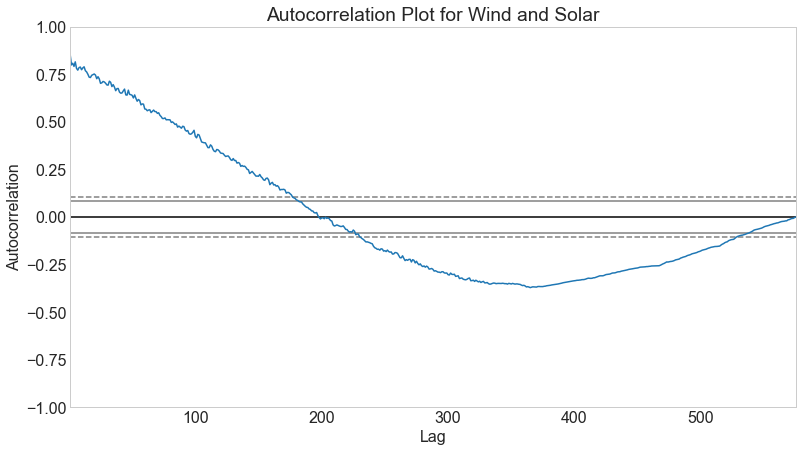

In [82]:
pd.plotting.autocorrelation_plot(train.wind_and_solar.resample('W').mean())
plt.title("Autocorrelation Plot for Wind and Solar")
plt.show()

### Seasonal Decomposition

In [83]:
y = train.wind.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
date,,,,
2006-01-01,0.0,NaN,37.343402,NaN
2006-01-08,0.0,NaN,86.129284,NaN
2006-01-15,0.0,NaN,83.660148,NaN
2006-01-22,0.0,NaN,67.158034,NaN
2006-01-29,0.0,NaN,20.688131,NaN


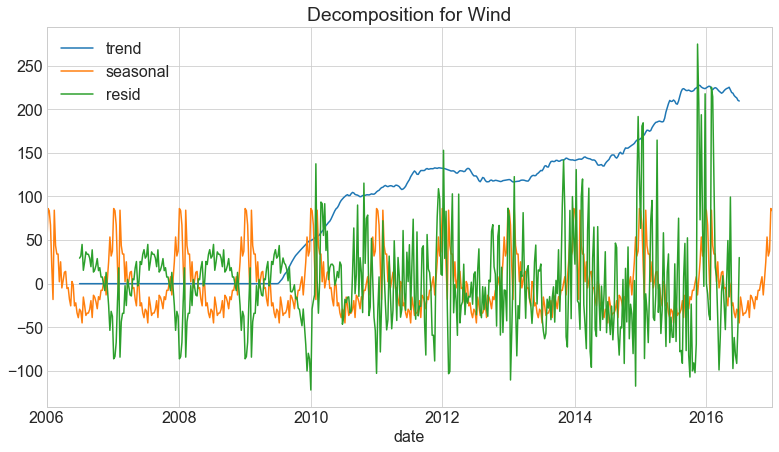

In [85]:
decomposition.iloc[:, 1:].plot()
plt.title('Decomposition for Wind')
plt.show()

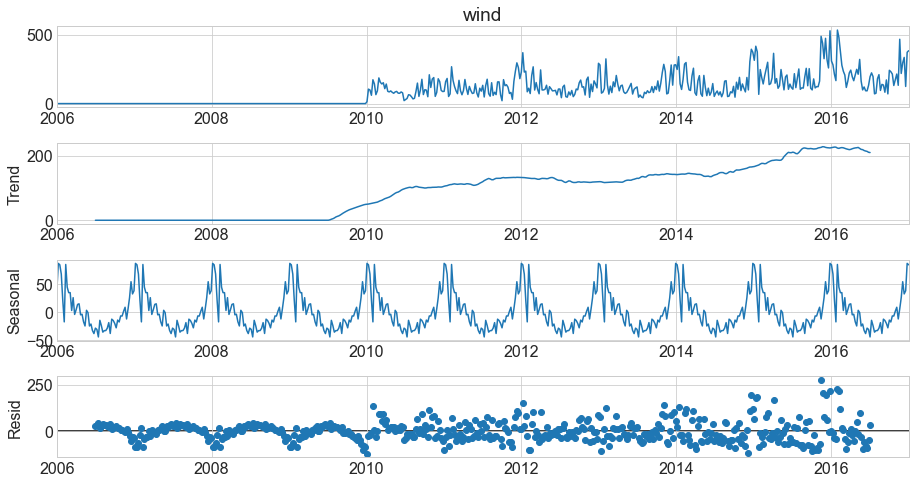

In [86]:
# the value returned from seasonal_decompose can itself be plotted:
result.plot()
None

In [87]:
y = train.solar.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
date,,,,
2006-01-01,0.0,NaN,-31.489949,NaN
2006-01-08,0.0,NaN,-29.068403,NaN
2006-01-15,0.0,NaN,-30.702312,NaN
2006-01-22,0.0,NaN,-28.889866,NaN
2006-01-29,0.0,NaN,-30.789656,NaN


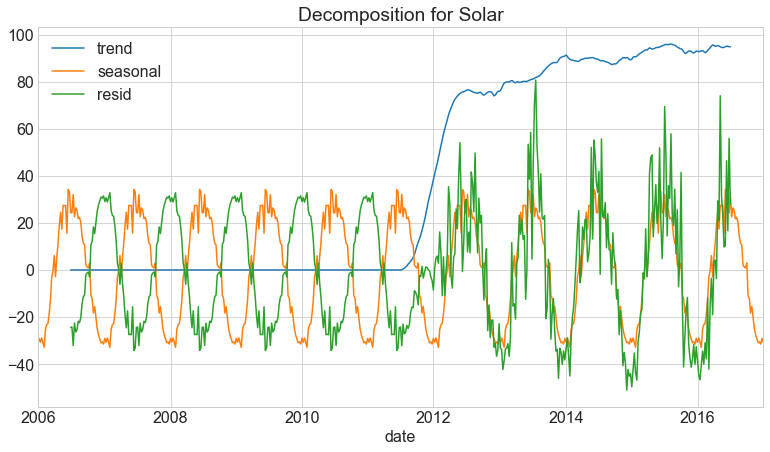

In [88]:
decomposition.iloc[:, 1:].plot()
plt.title('Decomposition for Solar')
plt.show()

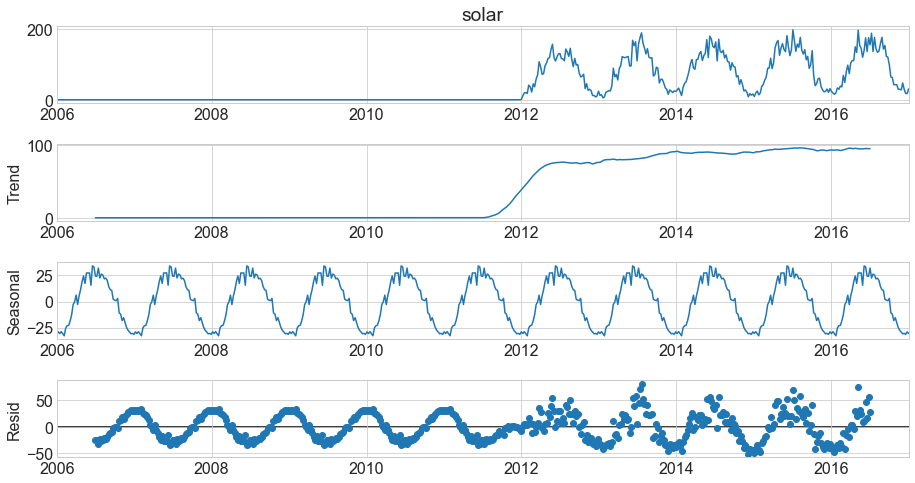

In [89]:
# the value returned from seasonal_decompose can itself be plotted:
result.plot()
None

In [90]:
y = train.wind_and_solar.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
date,,,,
2006-01-01,0.0,NaN,5.853453,NaN
2006-01-08,0.0,NaN,57.060881,NaN
2006-01-15,0.0,NaN,52.957836,NaN
2006-01-22,0.0,NaN,38.268168,NaN
2006-01-29,0.0,NaN,-10.101525,NaN


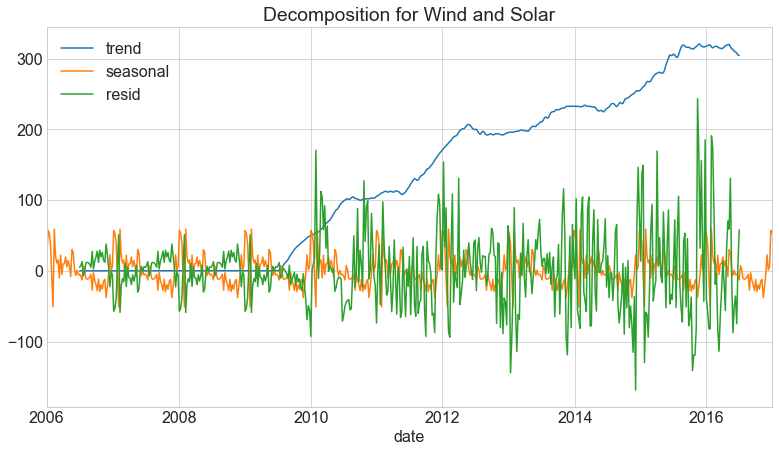

In [91]:
decomposition.iloc[:, 1:].plot()
plt.title('Decomposition for Wind and Solar')
plt.show()

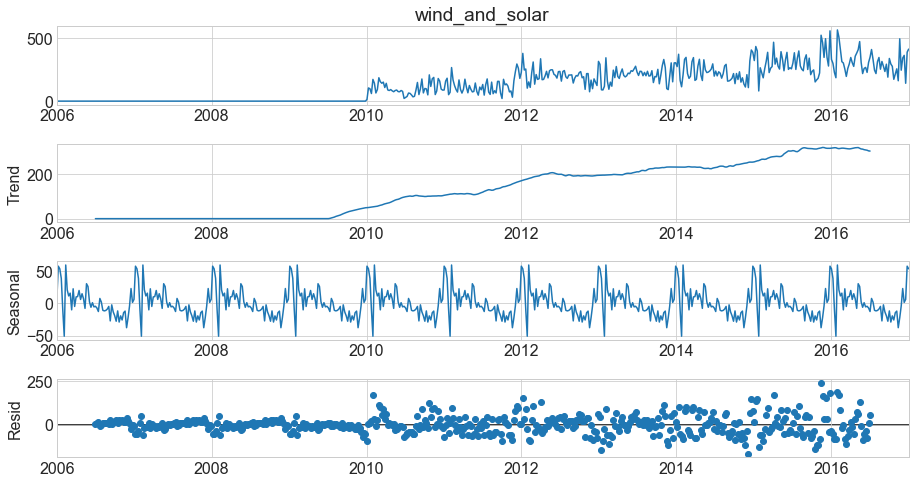

In [92]:
# the value returned from seasonal_decompose can itself be plotted:
result.plot()
None

## Store Sales

For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

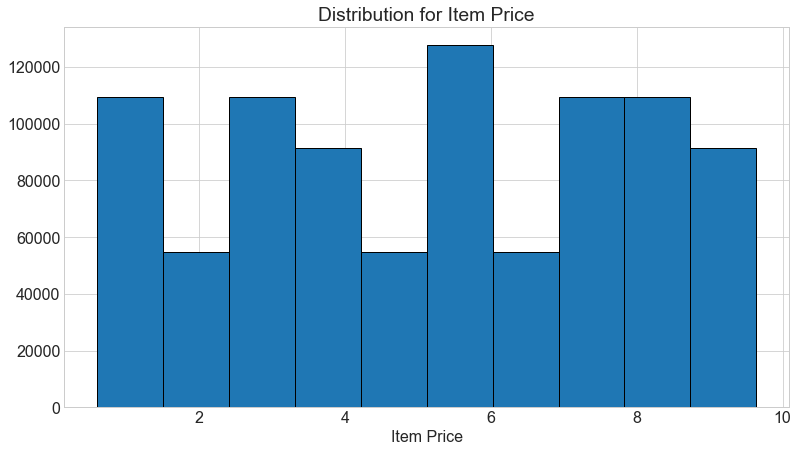

In [95]:
store = prepare_store_data()

In [97]:
store.head()

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,day_of_the_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Tuesday,10.92
2013-01-01 00:00:00+00:00,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,218.40
2013-01-01 00:00:00+00:00,27.0,832657,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,1,Tuesday,125.55
2013-01-01 00:00:00+00:00,54.0,213643,15000 San Pedro Ave,San Antonio,8,TX,78232,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,453.60
2013-01-01 00:00:00+00:00,35.0,215469,735 SW Military Dr,San Antonio,9,TX,78221,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,294.00


In [99]:
store.resample('D').sales_total.sum()

sale_date
2013-01-01 00:00:00+00:00     73844.01
2013-01-02 00:00:00+00:00     73570.58
2013-01-03 00:00:00+00:00     78169.48
2013-01-04 00:00:00+00:00     84467.73
2013-01-05 00:00:00+00:00     87621.85
                               ...    
2017-12-27 00:00:00+00:00    109151.15
2017-12-28 00:00:00+00:00    117377.49
2017-12-29 00:00:00+00:00    126541.84
2017-12-30 00:00:00+00:00    134903.07
2017-12-31 00:00:00+00:00    140905.74
Freq: D, Name: sales_total, Length: 1826, dtype: float64